In [1]:
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import mixture
from sklearn.svm.libsvm import predict


In [2]:
#产生数据
def create_data(centers,num=100,std=0.7):
    X,labels_true = make_blobs(n_samples=num,centers=centers, cluster_std=std)
    return X,labels_true
def plot_data(*data):
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbycm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label),
        color=colors[i%len(colors)]

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()


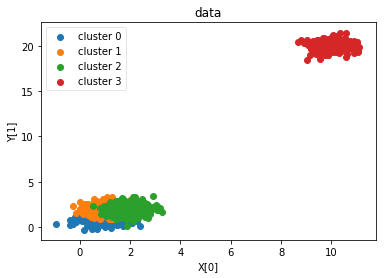

In [10]:
centers = [[1,1],[1,2],[2,2],[10,20]]
X,labels_true = create_data(centers,1000,0.5)
plot_data(X,labels_true)

In [12]:
def test_DBSCAN(*data):
    X,labels_true = data
    clst = cluster.DBSCAN();
    predict_labels = clst.fit_predict(X)
    print("ARI:%s"%adjusted_rand_score(labels_true,predict_labels))
    print("Core sample num:%d"%len(clst.core_sample_indices_))


In [13]:
test_DBSCAN(X,labels_true)

ARI:0.3314717019583459
Core sample num:991
